In [1]:
import sys; print("Python Version----", sys.version)
import numpy; print("Numpy Version----", numpy.__version__)
import scipy; print("Scipy Version----", scipy.__version__)
import sklearn; print("Scikit-Learn Version----", sklearn.__version__)
import pandas; print("Pandas Version----", pandas.__version__)
import statsmodels; print("Statsmodels Version----", statsmodels.__version__)
import pip; print("Pip Version----", pip.__version__)
import pmdarima; print("Pmdarima Version----", pmdarima.__version__)

Python Version---- 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy Version---- 1.16.3
Scipy Version---- 1.2.1
Scikit-Learn Version---- 0.20.3
Pandas Version---- 0.24.2
Statsmodels Version---- 0.9.0
Pip Version---- 19.0.3
Pmdarima Version---- 1.2.1


In [2]:
import warnings
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

In [3]:
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import metrics
from pmdarima.arima import auto_arima
import pmdarima as pm
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')

In [4]:
import plotly as py
# Import dependencies
import plotly.graph_objs as go
import ipywidgets as widgets
from scipy import special
# Configure Plotly to be rendered inline in the notebook.
py.offline.init_notebook_mode(connected=True)


In [5]:

plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [6]:
df = pd.read_csv('HPD2.csv', parse_dates=['Date'])
#df[['year','month']] = df.Date.apply(lambda x: pd.Series(x.strftime("%Y,%B").split(",")))
df.head()
df.tail()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_1507,Whse_C,Category_019,2011-09-02,1250
1,Product_0608,Whse_C,Category_001,2011-09-27,5
2,Product_1933,Whse_C,Category_001,2011-09-27,23
3,Product_0875,Whse_C,Category_023,2011-09-30,5450
4,Product_0642,Whse_C,Category_019,2011-10-31,3


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1002756,Product_1954,Whse_J,Category_001,2017-01-06,3
1002757,Product_1710,Whse_J,Category_026,2017-01-06,15
1002758,Product_1904,Whse_C,Category_019,2017-01-09,4000
1002759,Product_0250,Whse_C,Category_007,2017-01-09,148
1002760,Product_0471,Whse_C,Category_015,2017-01-09,30


In [7]:
df.columns


Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [8]:
Category_001 = df.loc[df['Product_Category'] == 'Category_001']
Category_001['Date'].min(), Category_001['Date'].max()
df.shape

(Timestamp('2011-09-27 00:00:00'), Timestamp('2017-01-06 00:00:00'))

(1002761, 5)

# Data Preprocessing

In [9]:
cols = [ 'Product_Code', 'Warehouse', 'Product_Category']
Category_001.drop(cols, axis=1, inplace=True)
Category_001 = Category_001.sort_values('Date')
Category_001.isnull().sum()

Date            0
Order_Demand    0
dtype: int64

# Aggregate demand for Category 001 by month

In [10]:

Category_001[['year','month']] = Category_001.Date.apply(lambda x: pd.Series(x.strftime("%Y,%m").split(",")))
Category_001 = Category_001.groupby(['year', 'month', ])[['Order_Demand']].sum().reset_index()
Category_001=Category_001[['year', 'month', 'Order_Demand']]
Category_001
#Category_001 = Category_001.groupby(['year', 'month', ])[['Order_Demand']].sum().reset_index()
#df2 = df[['year', 'month', 'Order_Demand', 'Product_Code', 'Warehouse', 'Product_Category', 'Date']]
# df2['Category_001'] = pd.to_datetime(df2['year', 'Order_Demand',])


,year,month,Order_Demand
0,2011,09,28
1,2011,12,957
2,2012,01,22172
3,2012,02,25866
4,2012,03,30002
5,2012,04,20960
6,2012,05,20391
7,2012,06,21214
8,2012,07,20313
9,2012,08,18159


In [11]:
Category_001_pivot = Category_001.pivot('month', 'year', 'Order_Demand')
Category_001_pivot

year,2011,2012,2013,2014,2015,2016,2017
month,,,,,,,
01,NaN,22172.0,22281.0,26276.0,35569.0,31214.0,29.0
02,NaN,25866.0,29030.0,26665.0,37465.0,33834.0,NaN
03,NaN,30002.0,26776.0,36264.0,34587.0,39711.0,NaN
04,NaN,20960.0,24464.0,25970.0,30803.0,32248.0,NaN
05,NaN,20391.0,21452.0,28438.0,25452.0,26485.0,NaN
06,NaN,21214.0,22989.0,29207.0,36159.0,35364.0,NaN
07,NaN,20313.0,30267.0,32801.0,34183.0,31433.0,NaN
08,NaN,18159.0,24993.0,28950.0,29797.0,26377.0,NaN
09,28.0,19864.0,27373.0,30246.0,27524.0,33249.0,NaN


<Figure size 1080x360 with 0 Axes>

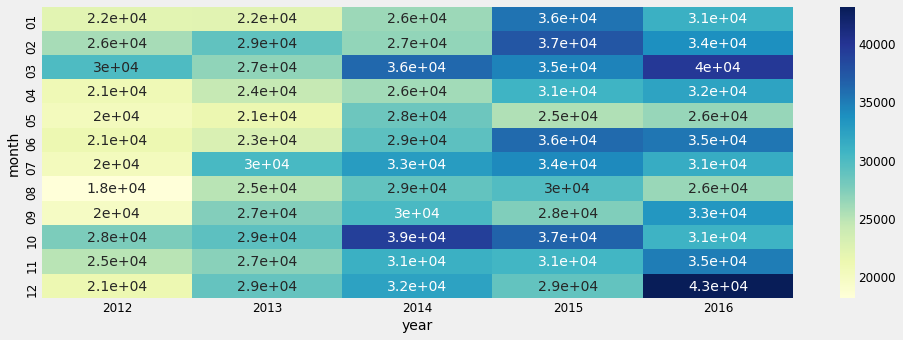

In [12]:
Category_001_pivot.drop('2011', axis=1, inplace=True)
Category_001_pivot.drop('2017', axis=1, inplace=True)
plt.figure(figsize=(15, 5))
sns.heatmap(Category_001_pivot, annot = True, cmap = "YlGnBu")

In [13]:
month = pd.date_range('20120131', periods = 60, freq = 'M')
month

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
      

In [14]:
#Length of values does not match length of index solution

In [15]:
Category_001 = Category_001.drop(Category_001.index[[0,1]])
Category_001 = Category_001.drop(Category_001.index[[-1]])
Category_001

,year,month,Order_Demand
2,2012,01,22172
3,2012,02,25866
4,2012,03,30002
5,2012,04,20960
6,2012,05,20391
7,2012,06,21214
8,2012,07,20313
9,2012,08,18159
10,2012,09,19864
11,2012,10,27648


In [16]:
Category_001['datestamp'] = month
Category_001.head()

,year,month,Order_Demand,datestamp
2,2012,01,22172,2012-01-31
3,2012,02,25866,2012-02-29
4,2012,03,30002,2012-03-31
5,2012,04,20960,2012-04-30
6,2012,05,20391,2012-05-31


In [17]:
y = Category_001.loc[:, ('datestamp', 'Order_Demand')]
y.head()
y.describe()

,datestamp,Order_Demand
2,2012-01-31,22172
3,2012-02-29,25866
4,2012-03-31,30002
5,2012-04-30,20960
6,2012-05-31,20391


,Order_Demand
count,60.000000
mean,29032.033333
std,5496.441132
min,18159.000000
25%,25762.500000
50%,28990.000000
75%,32446.250000
max,43144.000000


In [18]:
y.set_index('datestamp', inplace=True)
y.head()

,Order_Demand
datestamp,
2012-01-31,22172
2012-02-29,25866
2012-03-31,30002
2012-04-30,20960
2012-05-31,20391


# Visualizing Furniture Sales Time Series Data

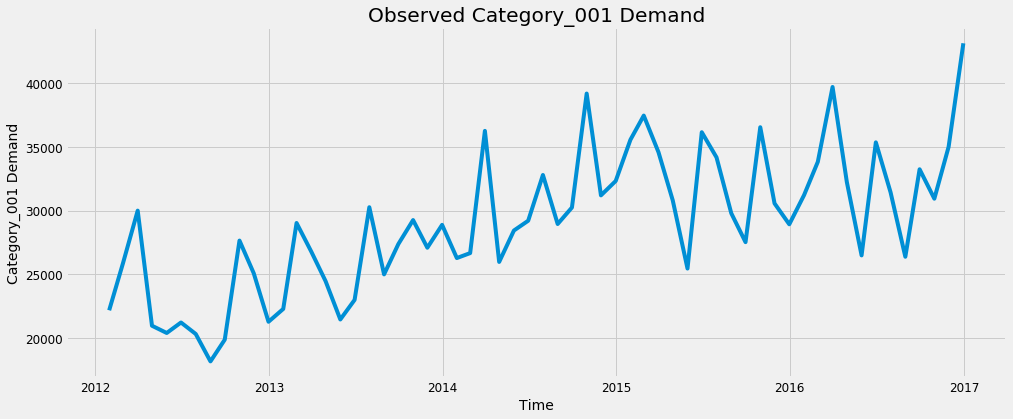

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('Category_001 Demand')
plt.title('Observed Category_001 Demand')
plt.show;

# Time-series decomposition plot

In [20]:
decomposition = seasonal_decompose(y.interpolate(), model='multiplicative')

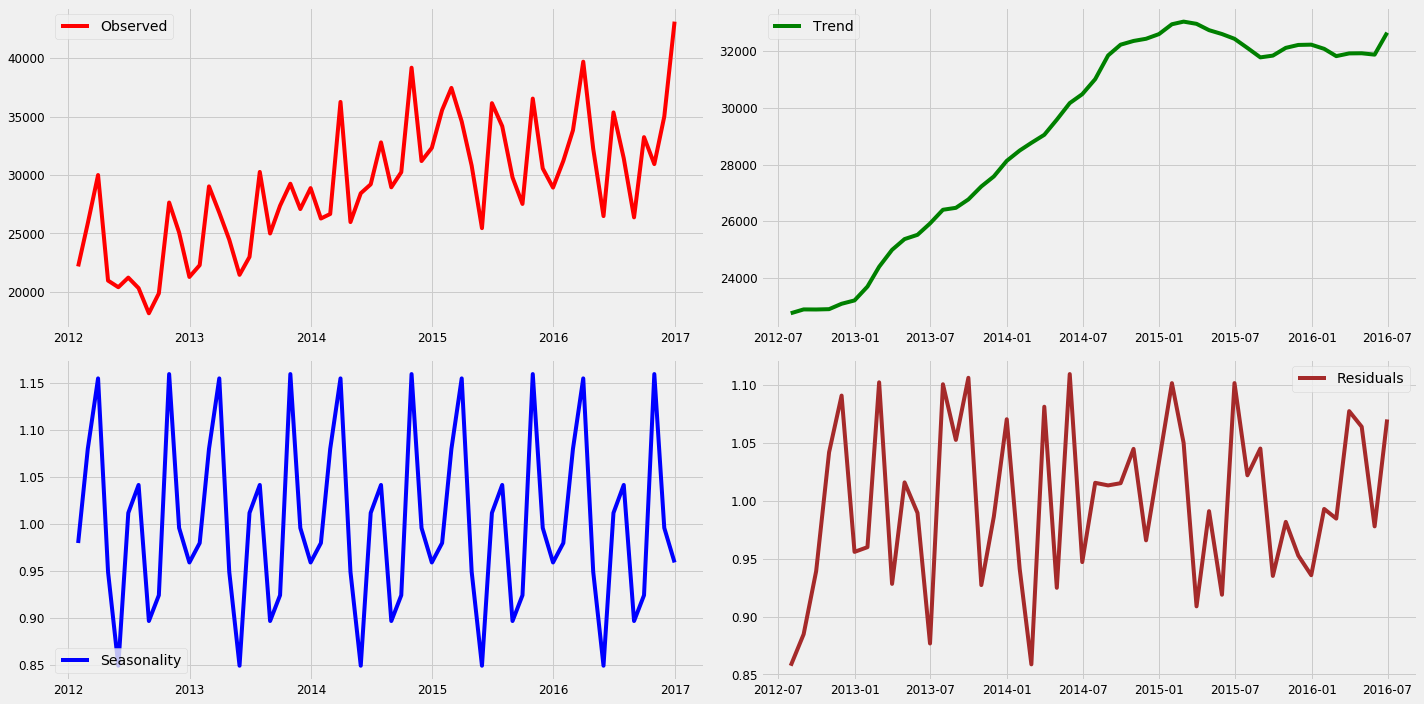

In [21]:
plt.figure(figsize=(20, 10))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(221)
plt.plot(y, color = 'Red', label = 'Observed')
plt.legend(loc = 'best')

plt.subplot(222)
plt.plot(trend, color = 'Green', label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(223)
plt.plot(seasonal, color = 'Blue', label = 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(224)
plt.plot(residual, color = 'Brown', label = 'Residuals')
plt.legend(loc = 'best')

plt.tight_layout()
plt.show;


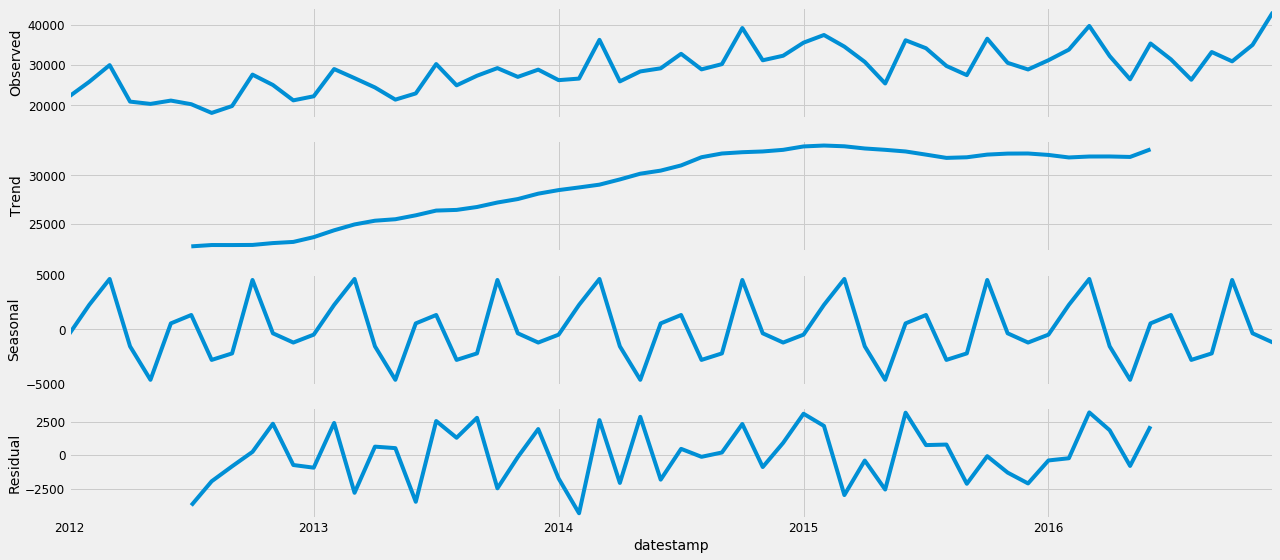

In [22]:
# simple way to build the same plot
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
res = sm.tsa.seasonal_decompose(y.interpolate(), model='additive')
resplot = res.plot()
resplot.savefig('Seasonal_Decompose.png', dpi=150)

In [23]:
y.shape

(60, 1)

In [24]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
#adf_test.is_stationary(y)
p_val, should_diff = adf_test.should_diff(y)  

In [25]:
train, test = y[:100], y[100:]
train.shape, test.shape

((60, 1), (0, 1))

In [26]:
train = y.loc['2012-01-31':'2015-12-31']
test = y.loc['2016-01-31':'2016-12-31']

In [27]:
Arima_model = auto_arima(y, start_p=1, start_q=1, max_p=8, max_q=8,
                         start_P=0, start_Q=0, max_P=8, max_Q=8, m=12, 
                         seasonal=True, trace=True, d=1, D=1, error_action='ignore', 
                         suppress_warnings=True, stepwise=True, random_state = 20, n_fits = 30)
Arima_model.summary()


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=942.792, BIC=950.192, Fit time=0.212 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=952.180, BIC=955.881, Fit time=0.014 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=934.992, BIC=942.393, Fit time=0.112 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=941.222, BIC=946.772, Fit time=0.045 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=929.003, BIC=938.254, Fit time=0.846 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(3, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=939.973, BIC=947.374, Fit time=0.600 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=931.626, BIC=94

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -459.501
Date:                            Thu, 04 Jul 2019   AIC                            929.003
Time:                                    20:05:48   BIC                            938.254
Sample:                                         0   HQIC                           932.484
                                             - 60                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     35.8636    671.013      0.053      0.957   -1279.297    1351.024
ar.L1         -0.4774      0.127     -3.763      0.000      -0.726      -0.229
ar.S.L12      -0.5713      0.171     -3.343      0.001      -0.906      -0.236
ar.S.L24      -0.3359      0.168     -1.995      0.046      -0.666      -0.006
sigma2      1.723e+07      0.042    4.1e+08      0.000    1.72e+07    1.72e+07
===================================================================================
Ljung-Box (Q):                       42.66   Jarque-Bera (JB):                 4.96
Prob(Q):                              0.36   Prob(JB):                         0.08
Heteroskedasticity (H):               1.42   Skew:                             0.72
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.41e+24. Standard errors may be unstable.
"""

In [28]:
#plt.plot(train)
#plt.plot(test)
#plt.show();

In [29]:
Arima_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 1, 0, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [30]:
future_forecast = Arima_model.predict(n_periods=12)
print(future_forecast)

[30906.62072743 33313.32203183 33329.18434216 28330.80842382
 25215.57061376 31085.62406589 32758.7976792  28094.72578204
 27748.93258973 34625.8197717  29148.14999531 28918.5395318 ]


In [31]:
#future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
#pd.concat([test,future_forecast],axis=1).iplot()

In [32]:
plt.figure(figsize=(15, 10))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Testing')
plt.plot(future_forecast, label = 'Prediction')
plt.legend(loc = 'upper left')
plt.show();

ValueError: view limit minimum -36816.450000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1080x720 with 1 Axes>

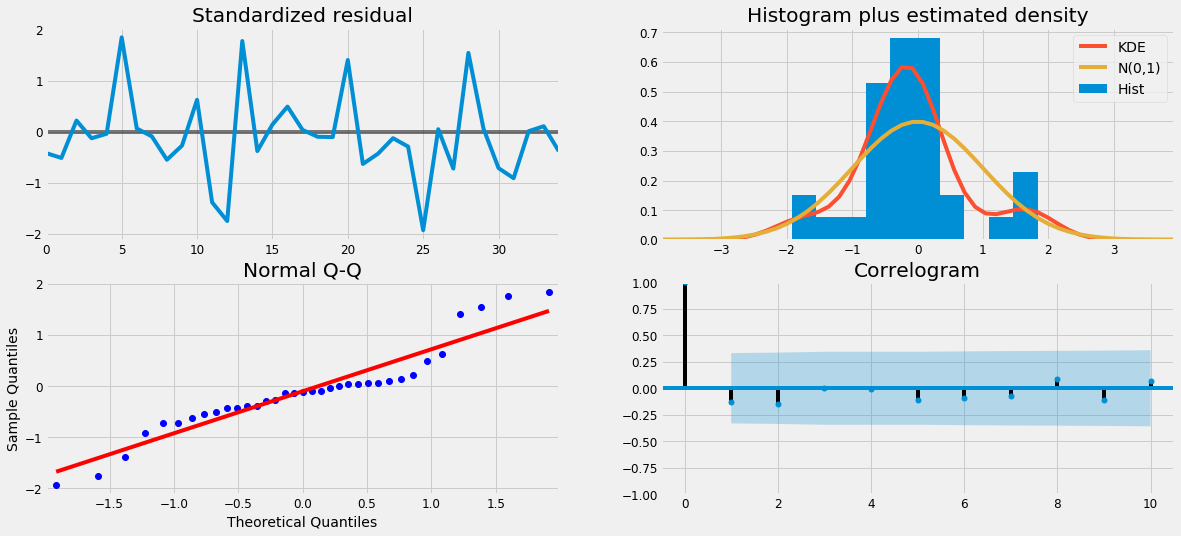

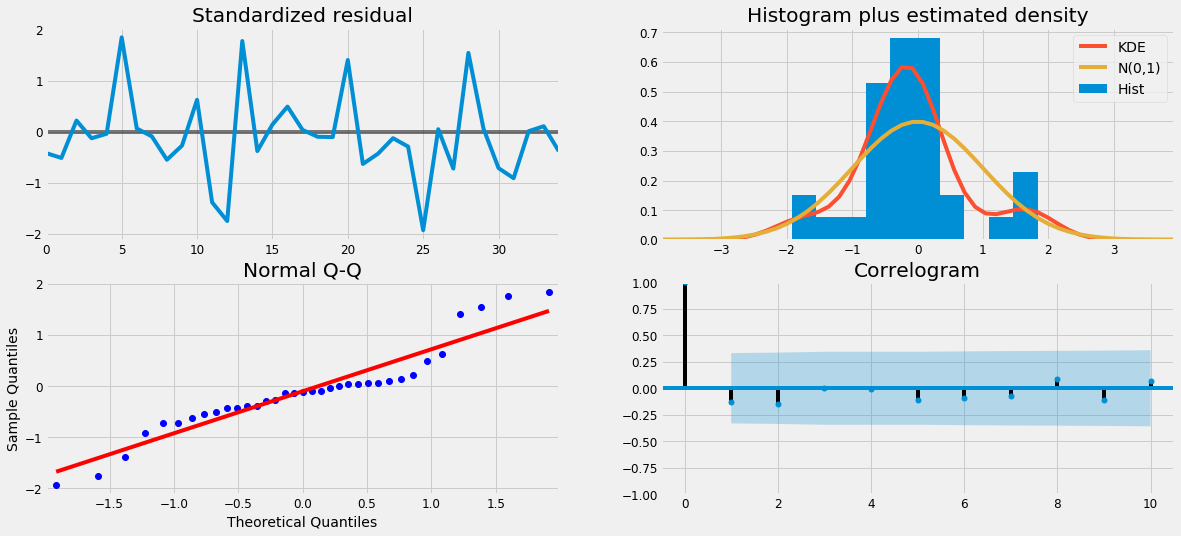

In [33]:
Arima_model.plot_diagnostics(figsize=(18, 8))
plt.show()

In [34]:
pred = Arima_model.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = y['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Category_001 Demand')
plt.legend()
plt.show()

AttributeError: 'ARIMA' object has no attribute 'get_prediction'

In [ ]:
y_forecasted = future_forecast.predicted_mean
y_truth = y['2016-01-31':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))